# Machine Learning Clustering

Hi saya Suwarti.. Disini saya akan coba sedikit sharing2 tentang Machine Learning Clustering..

Import library-library yg akan diperlukan..

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import davies_bouldin_score

load dataset.. disini kita akan menggunakan data gaji_pengeluaran.csv

In [21]:
df = pd.read_csv('data/gaji_pengeluaran.csv')

kita lakukan data profiling..

In [22]:
df.head()

,gaji,pengeluaran
0,2500,1750
1,3800,4200
2,3900,3800
3,4350,5500
4,4400,3200


In [23]:
df.shape

(30, 2)

In [24]:
X = np.asarray(df)

In [25]:
X

array([[ 2500,  1750],
       [ 3800,  4200],
       [ 3900,  3800],
       [ 4350,  5500],
       [ 4400,  3200],
       [ 5500,  5450],
       [ 5600,  5950],
       [ 5750,  4100],
       [ 6850,  6050],
       [ 6900,  8500],
       [ 7250,  9500],
       [ 7350,  6050],
       [ 7500,  8500],
       [ 7800,  9500],
       [ 8200,  8300],
       [ 8500,  6500],
       [ 8550,  8400],
       [ 8750,  6000],
       [ 9100, 10500],
       [ 9200,  8500],
       [ 6000,  8000],
       [ 5000,  4500],
       [ 6700,  5900],
       [ 4600,  5000],
       [ 5700,  8700],
       [ 6800,  5000],
       [ 9010,  7000],
       [ 8010,  7500],
       [ 8100,  8000],
       [ 3500,  3600]], dtype=int64)

Text(0.5, 1.0, 'Grafik Konsumen')

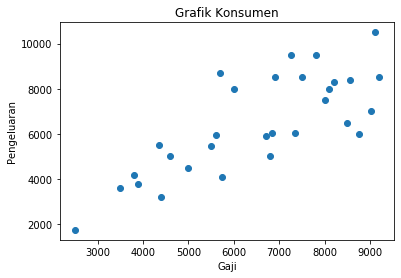

In [26]:
plt.scatter(X[:,0],X[:,1], label = 'True Position')
plt.xlabel("Gaji")
plt.ylabel("Pengeluaran")
plt.title("Grafik Konsumen")

# K-Means Clustering

untuk pemilihan banyak nya K, bisa melalui perhitungan Elbow Method..

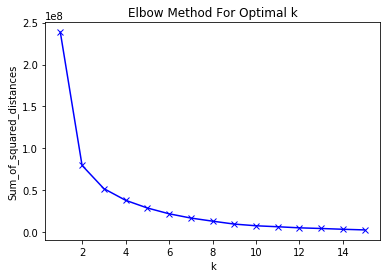

In [27]:
Sum_of_squared_distances = []
K = range(1,16)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

dari grafik Elbow Method itu, kita akan pilih K=3

In [28]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [29]:
print(kmeans.cluster_centers_)

[[4200.         3961.11111111]
 [7793.84615385 8530.76923077]
 [7006.25       5862.5       ]]


untuk melihat sebaik apa pemilihan K tersebut, kita gunakan perhitungan Davies Bouldin Score..
semakin kecil nilai Davies Bouldin Score nya, maka semakin baik terhadap pemilihan K nya..

In [30]:
from sklearn.metrics import davies_bouldin_score

In [31]:
print(davies_bouldin_score(X, kmeans.labels_))

0.7509190238483869


kita berikan label terhadap cluster nya..

In [32]:
df_clustered = pd.DataFrame(X)
df_clustered['cluster'] = pd.DataFrame(kmeans.labels_)
df_clustered = df_clustered.sort_values('cluster')
df_clustered = np.asarray(df_clustered)

In [33]:
df_clustered

array([[ 2500,  1750,     0],
       [ 4600,  5000,     0],
       [ 5000,  4500,     0],
       [ 5750,  4100,     0],
       [ 3500,  3600,     0],
       [ 3800,  4200,     0],
       [ 4350,  5500,     0],
       [ 4400,  3200,     0],
       [ 3900,  3800,     0],
       [ 6000,  8000,     1],
       [ 9200,  8500,     1],
       [ 9100, 10500,     1],
       [ 8550,  8400,     1],
       [ 5700,  8700,     1],
       [ 8200,  8300,     1],
       [ 7500,  8500,     1],
       [ 7250,  9500,     1],
       [ 6900,  8500,     1],
       [ 9010,  7000,     1],
       [ 8010,  7500,     1],
       [ 8100,  8000,     1],
       [ 7800,  9500,     1],
       [ 6800,  5000,     2],
       [ 5500,  5450,     2],
       [ 8500,  6500,     2],
       [ 7350,  6050,     2],
       [ 6850,  6050,     2],
       [ 5600,  5950,     2],
       [ 6700,  5900,     2],
       [ 8750,  6000,     2]], dtype=int64)

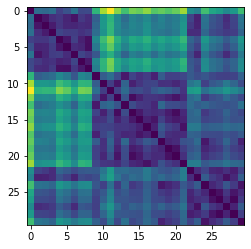

In [34]:
from scipy.spatial.distance import cdist
dist = cdist(df_clustered[:,0:2],df_clustered[:,0:2], metric='euclidean')
plt.imshow(dist)
plt.show()

# Hierarchical Clustering

tampilkan dendrogram nya..

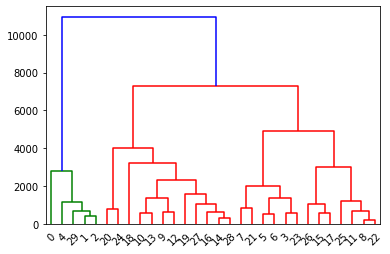

In [35]:
dendrogram = sch.dendrogram(sch.linkage(X, method='complete'))

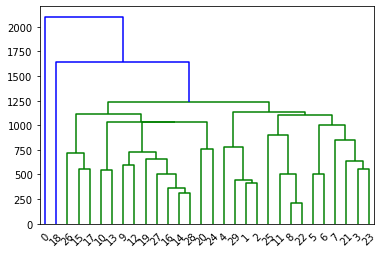

In [36]:
dendrogram = sch.dendrogram(sch.linkage(X, method='single'))

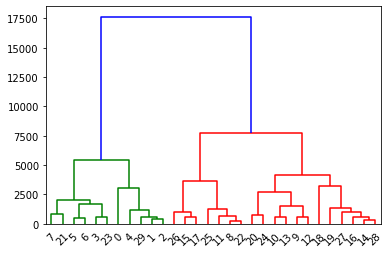

In [37]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

dari dendrogram tersebut kita ambli cluster nya yaitu 2

In [38]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_

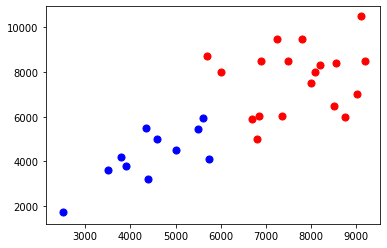

In [39]:
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.show()

kita bandingkan dengan hasil scatter plot dari  konsep K-Means

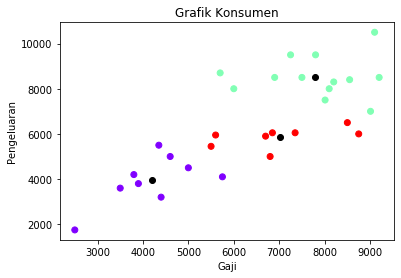

In [42]:
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.xlabel("Gaji")
plt.ylabel("Pengeluaran")
plt.title("Grafik Konsumen")
plt.show()

untuk melihat manakah konsep cluster yg lebih baik, kita gunakan perhitungan Davies Bouldin Score..

In [41]:
print(davies_bouldin_score(X, kmeans.labels_))
print(davies_bouldin_score(X, model.labels_))

0.7509190238483869
0.6149816577884296


dari dataset disini ternyata Davies Bouldin Score dari Hierarchical Clustering memiliki nilai yg lebih kecil..

artinya pemilihan cluster dari konsep Hierarchical Clustering lebih baik untuk dataset tersebut..

# Sekian

Sekian dulu untuk sharing2 kali ini, terima kasih..